In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\FingerLakes'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Field dataset 
Data0 = pd.read_csv('data_raw/Indices/FingerLakes.csv')

# Remove none values
Data = Data0.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B6        B7        B8       B8A  \
0  

In [5]:
# Descriptive statistics of all variables
list = ['3BDA', 'Chl-a']

# get the summary
desc_data = Data [list].describe()

# add the standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std'] * 3)
desc_data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std'] * 3)

# display it
desc_data

,3BDA,Chl-a
count,117.000000,117.000000
mean,-0.071347,5.229865
std,0.074212,4.332009
min,-0.173236,0.229200
25%,-0.131772,2.290000
50%,-0.092735,3.962000
75%,-0.033550,7.060000
max,0.110278,24.760000
+3_std,0.151288,18.225893
-3_std,-0.293982,-7.766163


In [6]:
# Pearson Coefficient 
corr = Data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,3BDA,Chl-a
3BDA,1.000000,0.203516
Chl-a,0.203516,1.000000


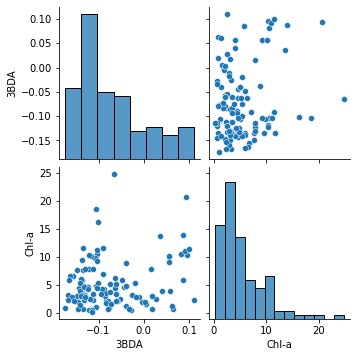

In [7]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data[list])

In [10]:
# Extract independent variables (X) & dependent variable (Y)
X = Data[X_columns]
X=add_constant(X)
Y = Data['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                  0.004115
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.949
Time:                        16:00:28   Log-Likelihood:                -228.29
No. Observations:                  81   AIC:                             460.6
Df Residuals:                      79   BIC:                             465.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0289      0.643      7.823      0.0

In [11]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 69     4.972373
46     5.003268
58     5.068064
114    4.971231
73     4.986851
98     5.012868
31     4.973791
53     4.994212
65     4.997673
96     4.980901
95     5.067005
97     4.972344
2      4.972687
62     4.970044
110    5.052612
55     4.981680
103    4.981344
100    4.959645
66     5.031096
44     4.984349
77     4.959369
17     5.012027
81     4.973927
74     4.984889
56     4.978078
94     4.956620
35     5.068760
38     5.045356
93     4.968300
48     4.981812
33     5.043980
59     5.065258
92     4.989839
42     4.994460
10     4.958889
85     4.996180
dtype: float64


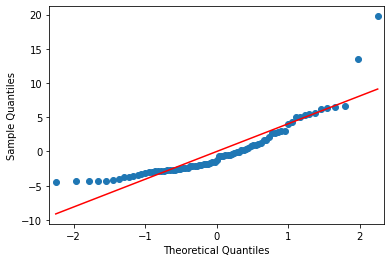

The mean of the residuals is -1.875e-15


In [12]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [13]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 23.5
MAE 3.6
RMSE 4.85


In [14]:
# MergedData: Threshold  Chl-a < 2
Data1 = Data.loc[(Data["Chl-a"] > 2)]
Data1.shape

(96, 25)

In [15]:
# get the summary
desc_data1 = Data1 [list].describe()

# add the standard deviation metric
desc_data1.loc['+3_std'] = desc_data1.loc['mean'] + (desc_data1.loc['std'] * 3)
desc_data1.loc['-3_std'] = desc_data1.loc['mean'] - (desc_data1.loc['std'] * 3)

# display it
desc_data1

,3BDA,Chl-a
count,96.000000,96.000000
mean,-0.073282,6.146367
std,0.075521,4.258724
min,-0.167801,2.022000
25%,-0.132168,3.175000
50%,-0.100478,4.745000
75%,-0.040492,7.909000
max,0.110278,24.760000
+3_std,0.153281,18.922538
-3_std,-0.299845,-6.629804


In [16]:
# Pearson Coefficient 
corr1 = Data1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,3BDA,Chl-a
3BDA,1.000000,0.273258
Chl-a,0.273258,1.000000


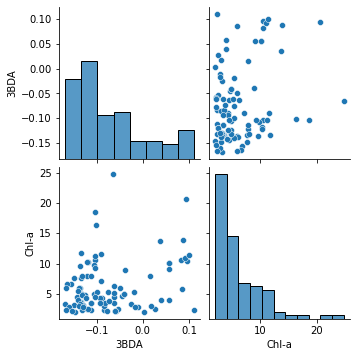

In [17]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data1[list])

In [18]:
# Extract independent variables (X) & dependent variable (Y)
X = Data1[X_columns]
X = add_constant(X)
Y = Data1['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     7.748
Date:                Wed, 02 Mar 2022   Prob (F-statistic):            0.00703
Time:                        16:00:58   Log-Likelihood:                -193.03
No. Observations:                  67   AIC:                             390.1
Df Residuals:                      65   BIC:                             394.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6491      0.825      9.271      0.0

In [19]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 46     6.350789
35     9.664326
52     5.690676
69     4.787658
95     9.575551
89     4.802049
76     6.085198
50     5.273928
98     6.836494
105    9.765294
72     4.728302
30     5.445322
112    6.385347
92     5.671341
36     8.824702
64     4.518917
45     5.162626
12     5.853208
4      7.992521
44     5.393547
62     4.669830
67     5.455429
21     5.422674
110    8.847332
116    7.283689
39     8.215401
37     7.118563
56     5.076265
104    9.456772
dtype: float64


In [20]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 12.6
MAE 3.08
RMSE 3.55


In [21]:
# MergedData: Threshold  Chl-a < 8
Data2 = Data.loc[(Data["Chl-a"] > 8)]
Data2.shape

(23, 25)

In [22]:
# get the summary
desc_data2 = Data2 [list].describe()

# add the standard deviation metric
desc_data2.loc['+3_std'] = desc_data2.loc['mean'] + (desc_data2.loc['std'] * 3)
desc_data2.loc['-3_std'] = desc_data2.loc['mean'] - (desc_data2.loc['std'] * 3)

# display it
desc_data2

,3BDA,Chl-a
count,23.000000,23.000000
mean,-0.025062,12.324000
std,0.093199,4.054804
min,-0.135495,8.864000
25%,-0.104556,10.091000
50%,-0.065664,10.568000
75%,0.068992,12.665000
max,0.100207,24.760000
+3_std,0.254534,24.488413
-3_std,-0.304658,0.159587


In [23]:
# Pearson Coefficient 
corr2 = Data2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,3BDA,Chl-a
3BDA,1.000000,0.021173
Chl-a,0.021173,1.000000


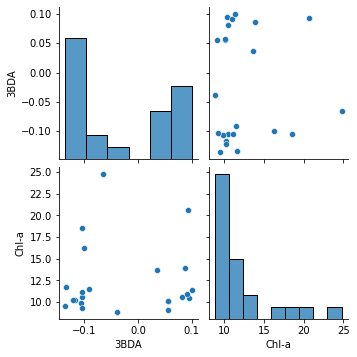

In [24]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data2[list])

In [25]:
# Extract independent variables (X) & dependent variable (Y)
X = Data2[X_columns]
X = add_constant(X)
Y = Data2['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.5028
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.490
Time:                        16:01:08   Log-Likelihood:                -44.708
No. Observations:                  16   AIC:                             93.42
Df Residuals:                      14   BIC:                             94.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2152      1.088     11.223      0.0

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [26]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 101    12.947050
89     13.303989
33     11.923981
69     13.309493
98     12.525959
87     11.764567
58     11.457985
dtype: float64


In [27]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 18.1
MAE 3.43
RMSE 4.26
